# Clustering (HCA)
Leah Hogenmiller (lmh2ur)

## Set Up

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from numpy.linalg import norm
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
colors = "YlGnBu"

In [23]:
OHCO = ['book_id', 'chap_id']

## Importing Tables

In [24]:
BOW = pd.read_csv('BOW.csv').set_index(OHCO+['term_str'])
LIB = pd.read_csv('LIB.csv').set_index('book_id')

In [25]:
LIB['label'] = LIB.author.str.split(', ').str[0] + ': ' +  LIB.title.str[:20] + ' (' + LIB.index.astype('str') + ')'
LIB['label'] = LIB.label.str.title()

In [26]:
LIB

,title,author,date,source_file_path,label
book_id,,,,,
863,The Mysterious Affair at Styles,Agatha Christie,1920,pg863.txt,Agatha Christie: The Mysterious Affai (863)
1155,The Secret Adversary,Agatha Christie,1922,pg1155.txt,Agatha Christie: The Secret Adversary (1155)
58866,The Murder on the Links,Agatha Christie,1923,pg58866.txt,Agatha Christie: The Murder On The Li (58866)
61168,The Man in the Brown Suit,Agatha Christie,1924,pg61168.txt,Agatha Christie: The Man In The Brown (61168)
65238,The Secret of Chimneys,Agatha Christie,1925,pg65238.txt,Agatha Christie: The Secret Of Chimne (65238)
69087,The Murder of Roger Ackroyd,Agatha Christie,1926,pg69087.txt,Agatha Christie: The Murder Of Roger (69087)
70114,The Big Four,Agatha Christie,1927,pg70114.txt,Agatha Christie: The Big Four (70114)
244,A Study in Scarlet,Arthur Conan Doyle,1887,pg244.txt,Arthur Conan Doyle: A Study In Scarlet (244)
834,The Memoirs of Sherlock Holmes,Arthur Conan Doyle,1893,pg834.txt,Arthur Conan Doyle: The Memoirs Of Sherl (834)


## TFIDF Matrix

In [27]:
get_tfidf = lambda X, agg_func='sum': (X.T / X.T.agg(agg_func)).T * (np.log2(len(X)/X.astype('bool').sum()))
TFIDF_CHAP = get_tfidf(BOW.n.unstack(fill_value=0))

In [28]:
TFIDF_CHAP

term_str         NaN         1        10  100  1000  100000  1015  1019  1023  \
book_id chap_id                                                                 
244     1        0.0  0.000000  0.000000  0.0   0.0     0.0   0.0   0.0   0.0   
        2        0.0  0.001002  0.001601  0.0   0.0     0.0   0.0   0.0   0.0   
        3        0.0  0.000000  0.000000  0.0   0.0     0.0   0.0   0.0   0.0   
        4        0.0  0.000000  0.000000  0.0   0.0     0.0   0.0   0.0   0.0   
        5        0.0  0.000000  0.000000  0.0   0.0     0.0   0.0   0.0   0.0   
...              ...       ...       ...  ...   ...     ...   ...   ...   ...   
70114   14       0.0  0.000000  0.003838  0.0   0.0     0.0   0.0   0.0   0.0   
        15       0.0  0.000000  0.000000  0.0   0.0     0.0   0.0   0.0   0.0   
        16       0.0  0.000000  0.000000  0.0   0.0     0.0   0.0   0.0   0.0   
        17       0.0  0.000000  0.000000  0.0   0.0     0.0   0.0   0.0   0.0   
        18       0.0  0.000000  0.000000  0.0   0.0     0.0   0.0   0.0   0.0   

term_str         1030  ...  zum    à  æsthetic        ça  élise  éliseif  \
book_id chap_id        ...                                                 
244     1         0.0  ...  0.0  0.0  0.000000  0.000000    0.0      0.0   
        2         0.0  ...  0.0  0.0  0.000000  0.000000    0.0      0.0   
        3         0.0  ...  0.0  0.0  0.000000  0.000000    0.0      0.0   
        4         0.0  ...  0.0  0.0  0.000000  0.000000    0.0      0.0   
        5         0.0  ...  0.0  0.0  0.000000  0.000000    0.0      0.0   
...               ...  ...  ...  ...       ...       ...    ...      ...   
70114   14        0.0  ...  0.0  0.0  0.000000  0.001171    0.0      0.0   
        15        0.0  ...  0.0  0.0  0.000000  0.000000    0.0      0.0   
        16        0.0  ...  0.0  0.0  0.000000  0.000000    0.0      0.0   
        17        0.0  ...  0.0  0.0  0.000000  0.000000    0.0      0.0   
        18        0.0  ...  0.0  0.0  0.002643  0.000000    0.0      0.0   

term_str         élises  émigrés  épatant  épouvantable  
book_id chap_id                                          
244     1           0.0      0.0      0.0           0.0  
        2           0.0      0.0      0.0           0.0  
        3           0.0      0.0      0.0           0.0  
        4           0.0      0.0      0.0           0.0  
        5           0.0      0.0      0.0           0.0  
...                 ...      ...      ...           ...  
70114   14          0.0      0.0      0.0           0.0  
        15          0.0      0.0      0.0           0.0  
        16          0.0      0.0      0.0           0.0  
        17          0.0      0.0      0.0           0.0  
        18          0.0      0.0      0.0           0.0  

[261 rows x 25084 columns]

In [29]:
TFIDF = TFIDF_CHAP.groupby(OHCO[:1]).sum()

In [30]:
TFIDF

term_str,NaN,1,10,100,1000,100000,1015,1019,1023,1030,...,zum,à,æsthetic,ça,élise,éliseif,élises,émigrés,épatant,épouvantable
book_id,,,,,,,,,,,,,,,,,,,,,
244,0.000000,0.002929,0.001601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
834,0.000000,0.000370,0.000287,0.000000,0.000591,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
863,0.001007,0.004196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.002319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1155,0.000000,0.001469,0.000000,0.002503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1661,0.000000,0.000000,0.000775,0.001974,0.004853,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001549,0.000418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002047,...,0.000000,0.001555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
58866,0.000000,0.002406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002111,0.000000,0.003914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Normalized Tables

In [31]:
L0 = TFIDF.astype('bool').astype('int') # Binary (Pseudo L)
L1 = TFIDF.apply(lambda x: x / x.sum(), 1) # Probabilistic
L2 = TFIDF.apply(lambda x: x / norm(x), 1) # Pythagorean / Euclidean

In [32]:
PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([LIB.index.tolist(), LIB.index.tolist()])).reset_index()
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])
PAIRS.index.names = ['doc_a', 'doc_b']

## Compute Distances

In [33]:
PAIRS['cityblock'] = pdist(TFIDF, 'cityblock')
PAIRS['euclidean'] = pdist(TFIDF, 'euclidean')
PAIRS['cosine'] = pdist(TFIDF, 'cosine')
PAIRS['jaccard'] = pdist(L0, 'jaccard')
PAIRS['dice'] = pdist(L0, 'dice')
PAIRS['js'] = pdist(L1, 'jensenshannon')  

In [34]:
PAIRS

cityblock  euclidean    cosine   jaccard      dice        js
doc_a doc_b                                                              
863   1155   18.360384   0.325437  0.639058  0.654367  0.486289  0.594587
      58866  22.920910   0.564631  0.871809  0.704522  0.543832  0.659511
      61168  36.644252   1.283551  0.893585  0.679885  0.515020  0.641366
      65238  18.863824   0.322878  0.604504  0.658317  0.490665  0.589785
      69087  20.551899   0.382889  0.705897  0.675141  0.509595  0.622852
...                ...        ...       ...       ...       ...       ...
3289  58866  47.959885   1.248453  0.863252  0.681559  0.516943  0.623760
      61168  43.619988   1.020571  0.843492  0.657413  0.489662  0.615359
      65238  43.510346   1.546947  0.911187  0.670148  0.503927  0.624044
      69087  39.258416   1.364699  0.896204  0.653077  0.484865  0.621629
      70114  32.222583   0.909187  0.686581  0.666742  0.500084  0.614597

[78 rows x 6 columns]

In [35]:
PAIRS.to_csv('PAIRS.csv')

## Creating Clusters

In [36]:
def hca(sims, linkage_method='complete', color_thresh=.3, figsize=(10, 10)):
    tree = sch.linkage(sims, method=linkage_method)
    labels = LIB.label.values
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 432x288 with 0 Axes>

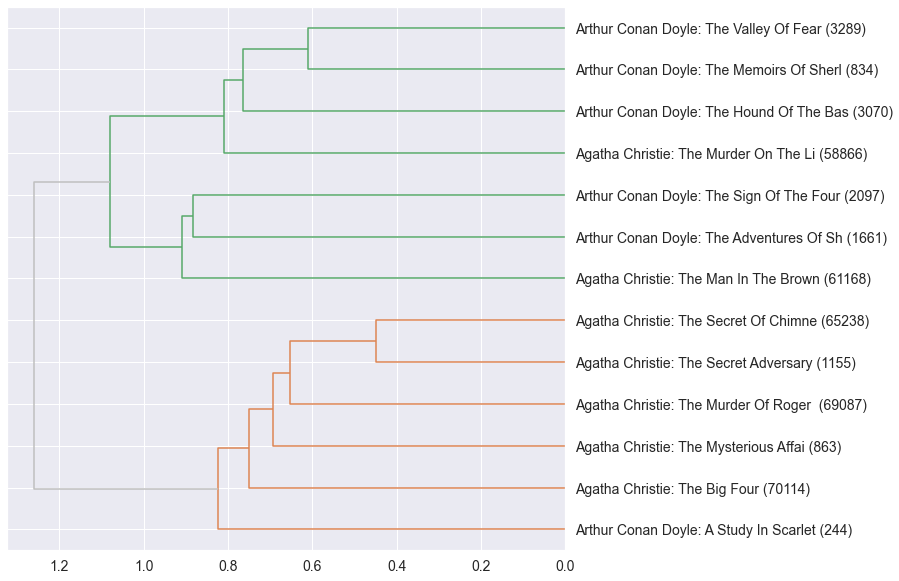

In [37]:
hca(PAIRS.cosine, linkage_method='ward', color_thresh = 1.1)

<Figure size 432x288 with 0 Axes>

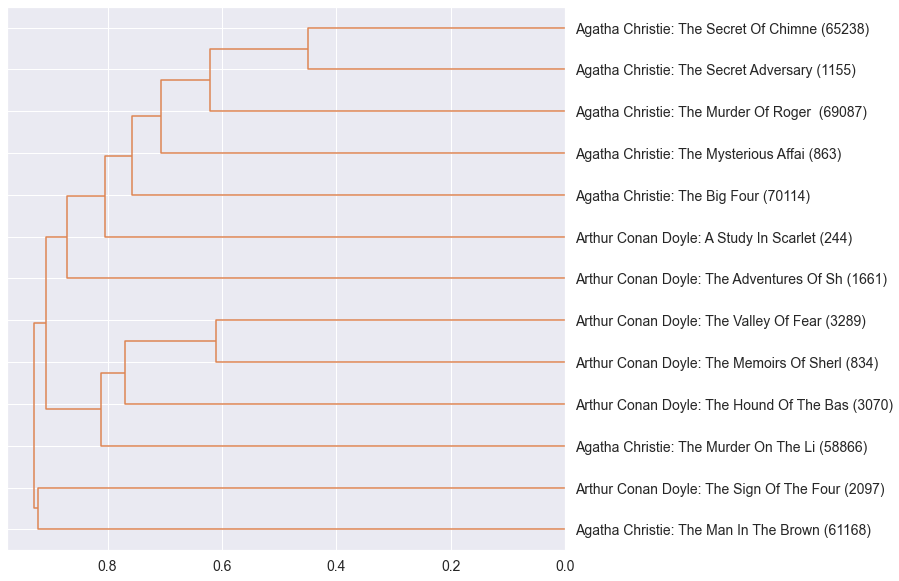

In [38]:
hca(PAIRS.cosine, linkage_method='complete', color_thresh=0.93)

<Figure size 432x288 with 0 Axes>

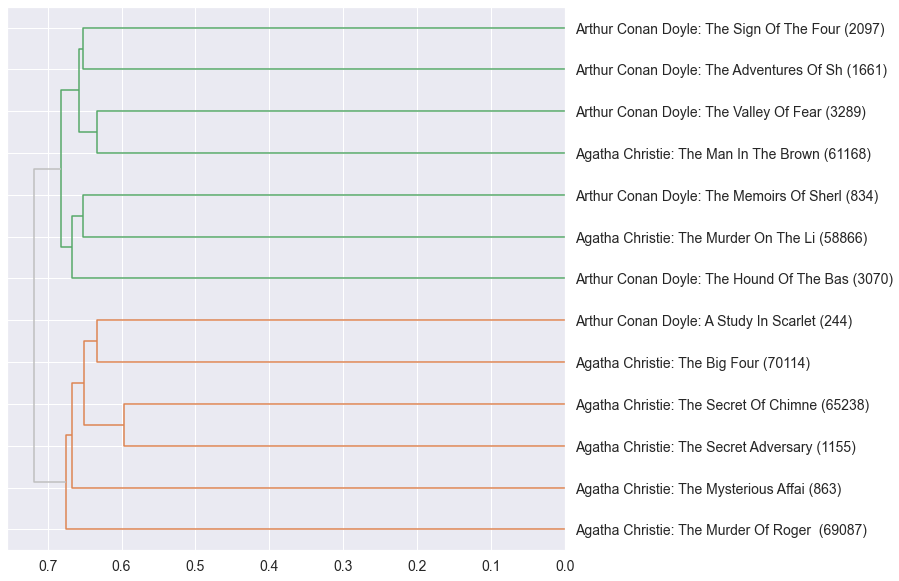

In [39]:
hca(PAIRS.jaccard, color_thresh=.7);

<Figure size 432x288 with 0 Axes>

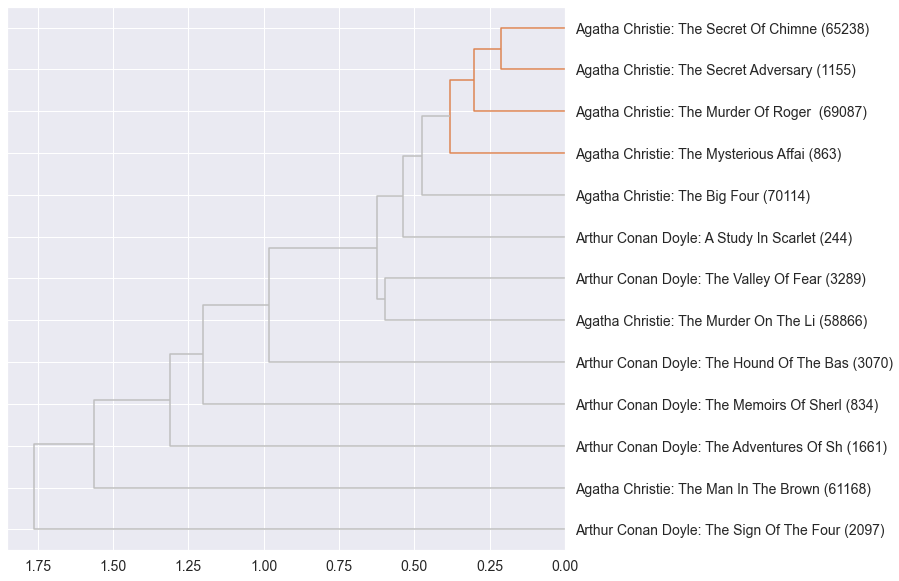

In [40]:
hca(PAIRS.euclidean, linkage_method='complete', color_thresh=0.45)

<Figure size 432x288 with 0 Axes>

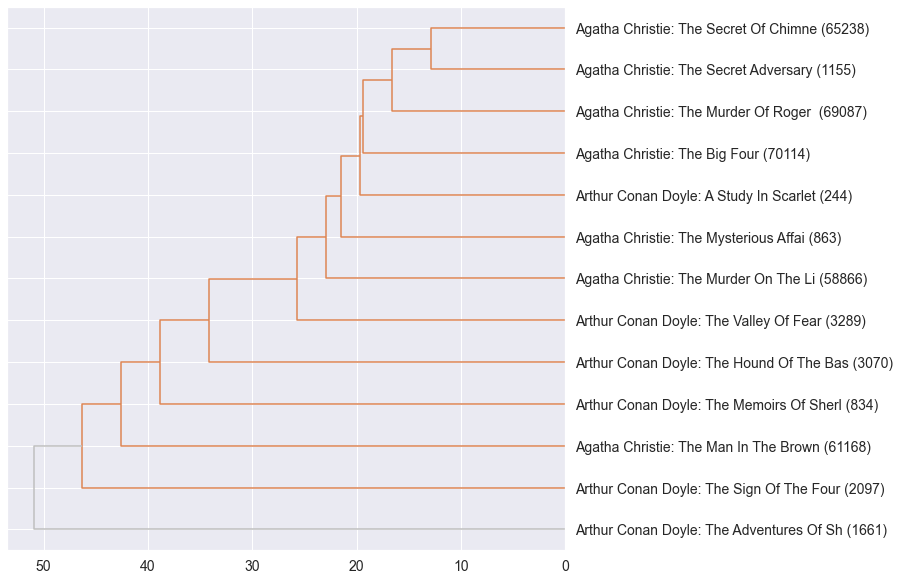

In [41]:
hca(PAIRS.cityblock, color_thresh=50)

<Figure size 432x288 with 0 Axes>

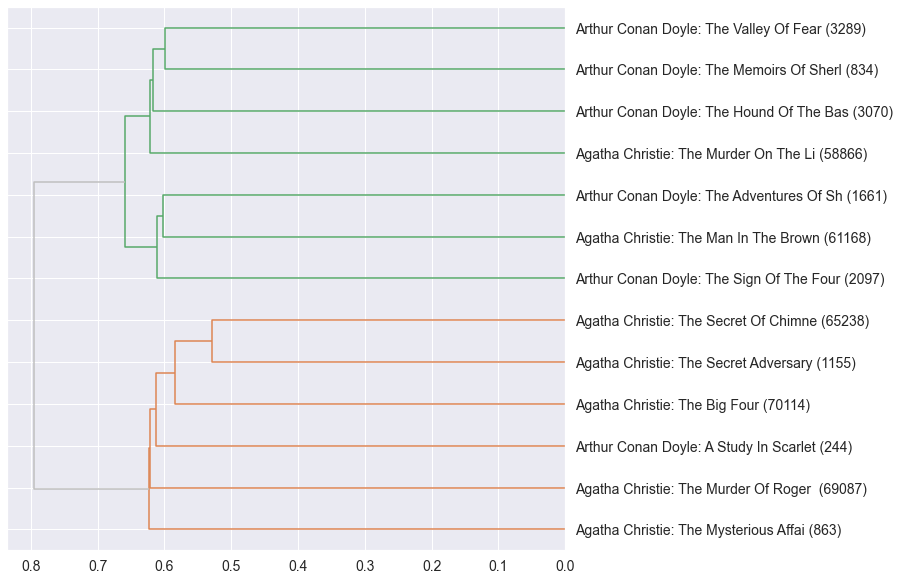

In [42]:
hca(PAIRS.js, linkage_method='ward', color_thresh=.7)